In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [15]:
def concentration(T):
    kB = 10**(-5)*8.62
    CEq = np.exp(0.6)*np.exp(-0.66/(kB*T))
    return CEq

500K
(9999,)
4.2614243230206666e-10
550K
(9999,)
8.538117920934559e-11
600K
(9999,)
-1.4444505360927437e-10
650K
(9999,)
-6.737830472628998e-11
700K
(9999,)
2.271227645831381e-10
750K
(9999,)
1.4143648694077614e-10
880K
(9999,)
2.204297848496328e-09


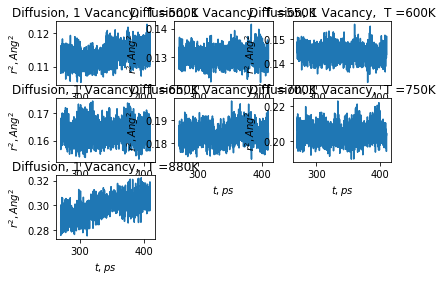

In [16]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 5 
iplot = 1
# Temp = [750]
Temp = [500, 550, 600, 650, 700, 750, 880]
for itemp in Temp:
    #preparing for reading
    filename = str(itemp)+'K'
    print(filename)
    listNotNumbers = []
    with open(filename) as f:
        iNumOfLine = 0
        for iline in f:
            try:
                a = [float(x) for x in iline.split()]
            except ValueError:
                if iNumOfLine >= 2240:
                    listNotNumbers.append(iNumOfLine)
            iNumOfLine += 1
    
    listNotNumbers = np.append(listNotNumbers,np.arange(0,2234))
    #reading file data
    df = pd.read_csv(filename, sep='\s+', header=None, skiprows=listNotNumbers, usecols=np.arange(13))
    names = ['step', 'Lx', 'Ly', 'Lz', 'Press', 'Pxx', 'Pyy', 'Pzz','potEng','totEng', 'msd','vacf', 'temp']
    df.rename(dict(zip(df.columns, names)), inplace='True', axis=1)
    df['volume'] = df['Lx']*df['Ly']*df['Lz']
    df['time'] = df['step']*0.001
    print(df['time'].shape)
    
    #fittng
    func = lambda x, a, b: a*x+b
    start = 3000
    stop = len(df['time'])
    xdata = df['time'][start:]
    ydata = df['msd'][start:]
    popt, pcov = curve_fit(func, xdata, ydata)
    D = popt[0]/6/10000 #[D] = cm^2/s 
    print(D)
    
    #calculation equilib on equil vacancy concentration
    CT = concentration(itemp)
    CSim = 1/4000
    DEq1V = D/CSim*CT
#     print('Duffusion Coeeficient, In Equilibrium by 1V mechanism')
#     print(DEq1V, 'cm^2/s')
    
    #plotting
    plt.subplot(3,3,iplot)
    iplot += 1
    plt.plot(xdata, func(xdata, *popt), 'g--')
    plt.plot(xdata, ydata)
    plt.ylabel('$r^2, Ang^2$')
    plt.xlabel('$t, ps$')
    plt.title('Diffusion, 1 Vacancy,  T =' + str(itemp) + 'K')
    
    
plt.show()